# Проект: Принятие решений в бизнесе

# Описание проекта:

Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга я подготовили список гипотез для увеличения выручки.
Прект состоит из 2 частей: часть 1. Приоритизация гипотез, часть 2. Анализ A/B-теста.

Цель первой части: Приоритизировать гипотезы применяя фреймворки ICE и RICE.

Цель второй части: Запустить A/B-тест ,проанализируйте результаты и постороить графики.

Приступим к работе с импорта библиотек

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from scipy import stats as st
from pandas.plotting import register_matplotlib_converters
import warnings

data= pd.read_csv('/datasets/hypothesis.csv')
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [2]:
np.array(data['Hypothesis']) # Посмотрим название гипотез целиком

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

In [3]:
data.columns = [x.lower() for x in data.columns] # Название столбцов в нижний регист
data

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Никакую предобработку таблицы делать не стоит, здесь все понятно , без пропусков дубликатов и аномалий

Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [4]:
data['ICE'] = ((data['impact'] * data['confidence'])/data['efforts']).round(1)
data.sort_values( 'ICE', ascending = False)
pd.set_option('display.max_colwidth', 0)
data

,hypothesis,reach,impact,confidence,efforts,ICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2


Больше всего очков получила гипотеза под номеров 8: 'Запустить акцию, дающую скидку на товар в день рождения'

Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [5]:
data['RICE'] = (data['reach'] * data['impact'] * data['confidence'])/data['efforts']
data.sort_values( 'RICE', ascending = False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


Применяя фреймворк RICE больший приоритет получила гипотеза 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'. Так как у нее показатель reach, то есть охват имеет максимальный балл - 10.
Гипотеза под номеров 8: 'Запустить акцию, дающую скидку на товар в день рождения' опустилась в середину списка, так как у нее показатель reach минимальный и составляет - 1.


# Часть 2. Анализ A/B-теста

Ознакомимся с таблицами

In [6]:
orders= pd.read_csv('/datasets/orders.csv')
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [7]:
orders=orders.rename(columns={'transactionId':'orderId', 'visitorId': 'userId'})

In [8]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [9]:
orders.dtypes

orderId    int64         
userId     int64         
date       datetime64[ns]
revenue    int64         
group      object        
dtype: object

In [10]:
orders.isna().sum()  # Пропусков в данных нет, работаем дальше

orderId    0
userId     0
date       0
revenue    0
group      0
dtype: int64

In [11]:
orders.duplicated().sum() # Дубликатов тоже нет

0

In [12]:
visitors= pd.read_csv('/datasets/visitors.csv')
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [13]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))


In [14]:
visitors.dtypes

date        datetime64[ns]
group       object        
visitors    int64         
dtype: object

In [15]:
visitors.isna().sum()


date        0
group       0
visitors    0
dtype: int64

In [16]:
visitors.duplicated().sum()

0

С данными все в порядке, работаем дальше

In [17]:
visitors['group'].value_counts()

A    31
B    31
Name: group, dtype: int64

In [18]:
visitors.shape

(62, 3)

Методом shape определил сколько всего данных. Как раз количесто A + B = 62. Группы не пересекаются

In [19]:
orders.group.value_counts()

B    640
A    557
Name: group, dtype: int64

In [20]:
orders.shape

(1197, 5)

ЗДесь также количество A + B = 1197, как и общее количество записей в таблице. Не пересекаются данные

Создадим комулятивную таблицу объединяющую таблицы orders и visitors.До этого создадим таблицы ordersAggregated 
и visitorsAggregated , чтобы потом объединить


In [21]:
datesGroups = orders[['date','group']].drop_duplicates() 

ordersAggregated = datesGroups\
.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'orderId' : 'nunique', 'userId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups\
.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


1. Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.,
        18140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

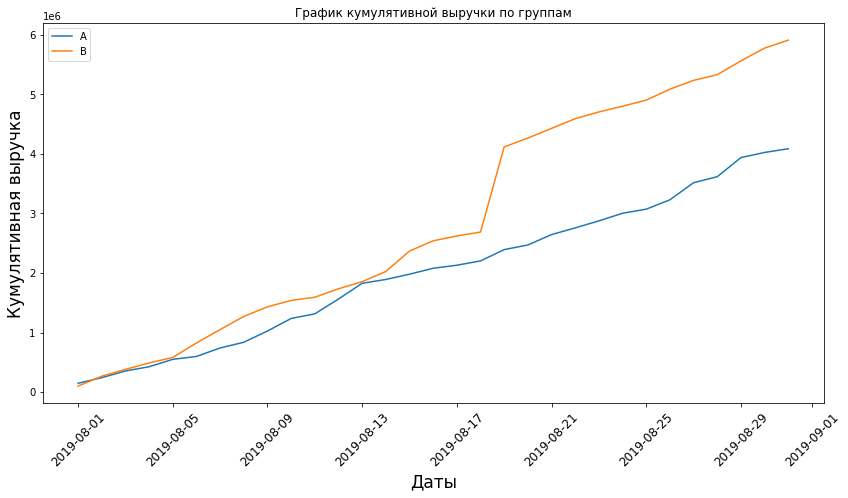

In [22]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.figure(figsize=(14, 7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Даты', fontsize='17')
plt.ylabel('Кумулятивная выручка', fontsize='17')
plt.xticks(fontsize='12', rotation = 45)

В первой 2/3 теста наблюдались колебания, но затем группа В показывает доход стабильно выше шруппы А

Вначале графики шли почти вровень, вплоть до 13 августа 2019. Но дальше график В показывает превосходство
над A и примерно с 19 августа оба графика уже стабилизировались и шли почти пареллельно друг другу.
Значит резко увеличилась выручка. Это может быть из за того что новые нововведения стали лучше пониматься пользователями, клиентами и лояльность у группы B стала выше


2. График кумулятивного среднего чека по группам

(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.,
        18140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

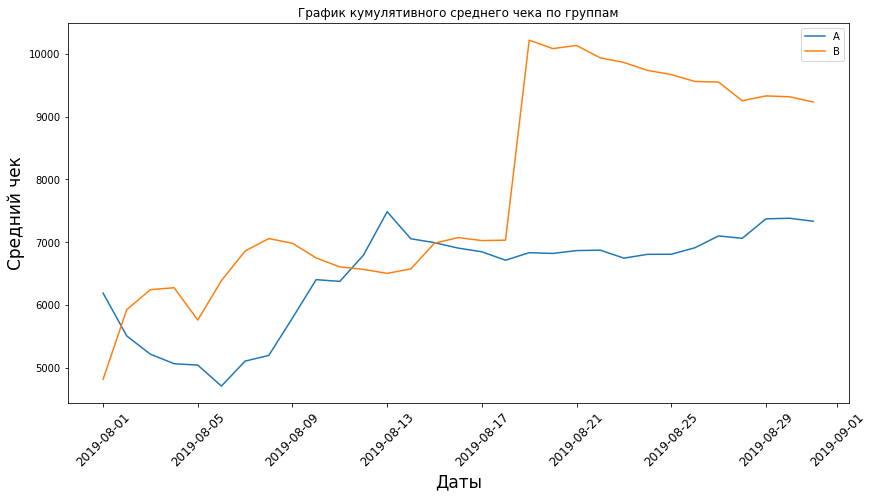

In [23]:
plt.figure(figsize=(14, 7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Даты', fontsize='17')
plt.ylabel('Средний чек', fontsize='17')
plt.xticks(fontsize='12', rotation = 45)

Чтобы найти средний чек надо общую выручку разделить на количество заказов. На оси Х даты , по оси Y средний чек.
Кумулятивное значение среднего чека по сегментам колеблится. Принимать решение по этой метрике рано или требуется
дополнительный анализ выбросов


Вывод: С 1 по 11 августа 2019 группа B по среднему чеку лидировала, однако 13 августа группа А вышла вперед, опередив группу B.
Это говорит о том что в группе A в этот день произошла аномально крупная покупка, что увеличило средний чек.
18 августа же наоборот, график B резко рванул вверх, скорее всего там была произведена аномально крупная покупка.
Далее графики постепенно стабилизировались.

3. График относительного изменения кумулятивного среднего чека группы B к группе A

In [24]:
# собираем данные в одном датафрейме , для этого объединим таблицы cumulativeRevenueA и cumulativeRevenueB
mergedCumulativeRevenue = cumulativeRevenueA\
.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


Text(0, 0.5, 'Степень различия')

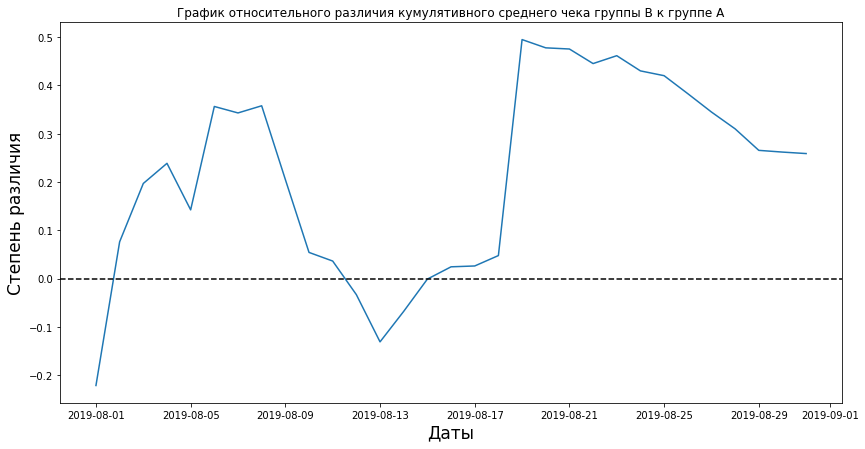

In [25]:
# Построим график относительного различия кумулятивного среднего чека группы B к группе A. 
plt.figure(figsize=(14, 7))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])\
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного различия кумулятивного среднего чека группы B к группе A')
plt.xlabel('Даты', fontsize='17')
plt.ylabel('Степень различия', fontsize='17')

В основном средний чек группы В находится выше группы А, однако имеются колебания графика на его протяжении.
Это может говорить об аномальных покупках.

4. График кумулятивного среднего количества заказов на посетителя по группам.

In [26]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders','visitors']]
cumulativeDataA['average_order']= cumulativeDataA['orders']/cumulativeDataA['visitors']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders','visitors']]
cumulativeDataB['average_order']= cumulativeDataB['orders']/cumulativeDataB['visitors']

Text(0, 0.5, 'Среднее количество заказов на посетителя')

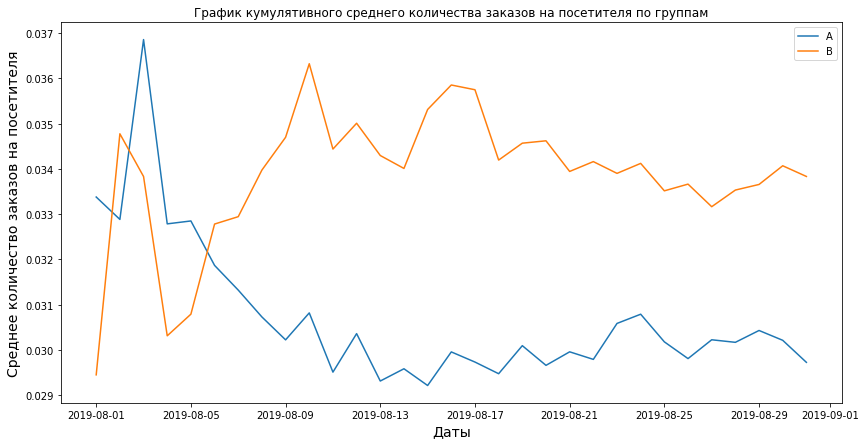

In [27]:
plt.figure(figsize=(14, 7))
plt.plot(cumulativeDataA['date'], cumulativeDataA['orders']/cumulativeDataA['visitors'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeDataB['orders']/cumulativeDataB['visitors'], label='B')
plt.legend()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Даты', fontsize='14')
plt.ylabel('Среднее количество заказов на посетителя', fontsize='14')

График группы B вскоре после начала эксперимента вышел вперед и показывает среднее количества заказов на посетителя 
больше чем в группе A и стабильно выше , хотя есть небольшие колебания

Также дополнил графики

5. График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

In [28]:
# собираем данные в одном датафрейме , для этого объединим таблицы cumulativeDataA и cumulativeDataB
mergedCumulativeData = cumulativeDataA\
.merge(cumulativeDataB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeData.head()

,date,revenueA,ordersA,visitorsA,average_orderA,revenueB,ordersB,visitorsB,average_orderB
0,2019-08-01,148579,24,719,0.033380,101217,21,713,0.029453
1,2019-08-02,242401,44,1338,0.032885,266748,45,1294,0.034776
2,2019-08-03,354874,68,1845,0.036856,380996,61,1803,0.033833
3,2019-08-04,425699,84,2562,0.032787,489567,78,2573,0.030315
4,2019-08-05,549917,109,3318,0.032851,581995,101,3280,0.030793


Text(0.5, 1.0, 'Относительное различия кумулятивного среднего количества заказов на посетителя группы B к группе A')

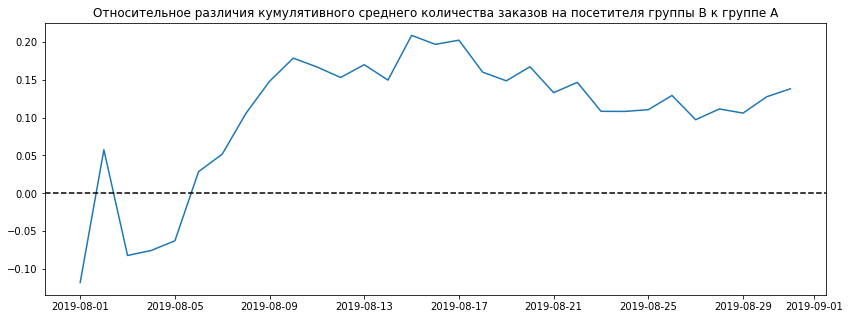

In [29]:
# Построим график относительного различия кумулятивного среднего количества заказов на посетителя группы B к группе A.
plt.figure(figsize=(14, 5))
plt.plot(mergedCumulativeData['date'], (mergedCumulativeData['ordersB']/mergedCumulativeData['visitorsB'])\
         /(mergedCumulativeData['ordersA']/mergedCumulativeData['visitorsA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('Относительное различия кумулятивного среднего количества заказов на посетителя группы B к группе A')

Здесь группа B после колебаний вначале , уже длительное время выше относительной линии, наглядно виден результат.
Эксперимент можно признать удачным

Грфик зафиксировался у значений 0.10 - 0.15

6. Точечный график количества заказов по пользователям.

In [30]:
ordersByUsers = (
    orders.groupby('userId', as_index=False)
    .agg({'orderId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']
ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Text(0, 0.5, 'Количество заказов на пользователя')

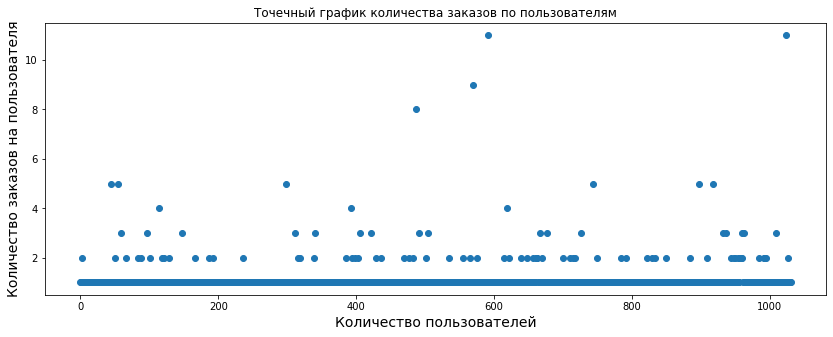

In [31]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(14, 5))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Количество пользователей', fontsize='14')
plt.ylabel('Количество заказов на пользователя', fontsize='14')

В основном пользователи делают 1 заказ, в редких случаях 2. То что выше  можно считать аномалиями

7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберим границу для определения аномальных пользователей.

In [32]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не более 5 процентов пользователей совершили более 2 заказов, и не более 1 процента пользователей совершили 4
и более заказов. То что больше 2 заказов приму за аномалии

8. Точечный график стоимостей заказов

In [33]:
orders.sort_values(by='revenue', ascending=False).head(10)



,orderId,userId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


Text(0, 0.5, 'Стоимость заказов')

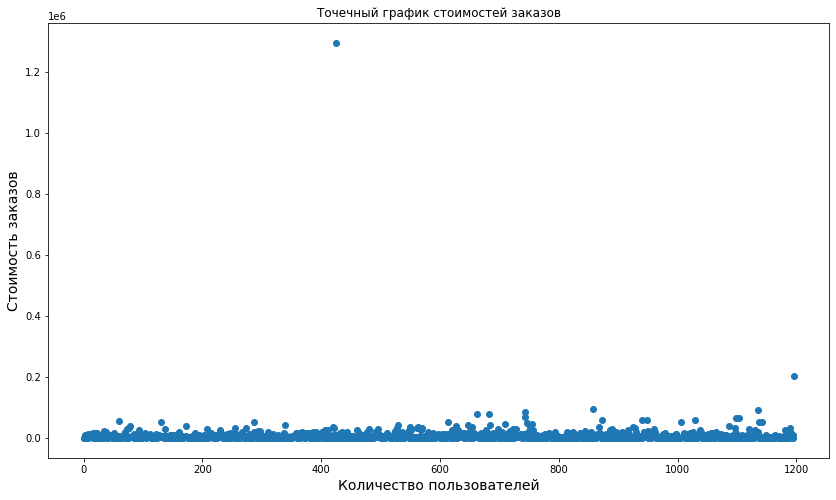

In [34]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(14, 8))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Количество пользователей', fontsize='14')
plt.ylabel('Стоимость заказов', fontsize='14')

Text(0, 0.5, 'Стоимость заказов')

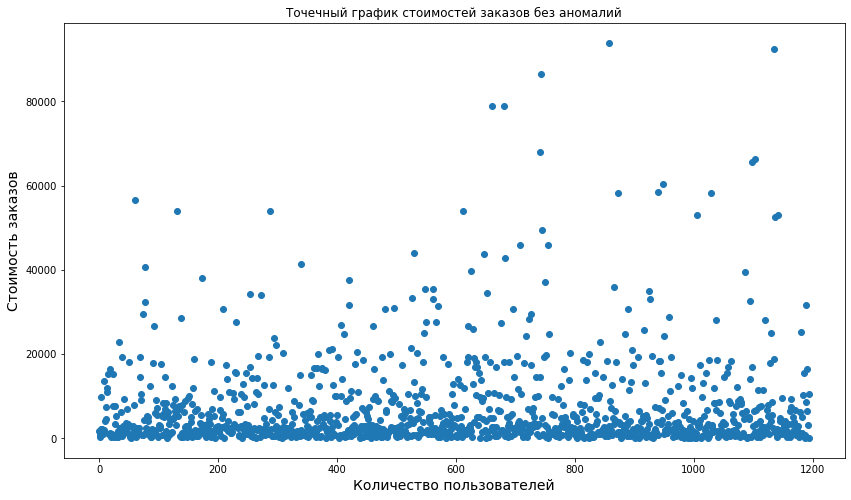

In [35]:
orders1 = orders.query('revenue < 100000')
x_values = pd.Series(range(0, len(orders1['revenue'])))
plt.figure(figsize=(14, 8))
plt.scatter(x_values, orders1['revenue'])
plt.title('Точечный график стоимостей заказов без аномалий')
plt.xlabel('Количество пользователей', fontsize='14')
plt.ylabel('Стоимость заказов', fontsize='14')

В основном стоимость заказов сосредоточена в границах до 28 000 руб

9. Посчитаем 95-й и 99-й перцентили стоимости заказов

In [36]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

95 процентов всех заказов находятся в границах стоимости до 28000 . Один процент заказов имеет стоимость более 58233.
Заказы выше 28000 будем считать аномальными

10. Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

In [37]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [38]:
ordersByUsersA = (               # Сгруппируем заказы по пользователям в каждой группе
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

In [39]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA']
.sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

In [40]:
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB']
.sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Статистическая значимость различия среднего количества заказов,  p-value для сравнения среднего между группами

Проверка гипотез будет осуществляться на основе "сырых" данных

H0 :  В среднем количестве заказов на посетителя между группами нет статистически значимых различий

H1 :  В среднем количестве заказов на посетителя между группами есть статистически значимые различия

Уровень значимости alpha = 0.05

Для проверки используется критерий Манна - Уитни

In [41]:
pvalue = "{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1])
pvalue

'0.017'

p-value меньше уровня значимости 0.05 , значит нулевую гипотезу отвергаем.
Это значит что в среднем количестве заказов между группами есть статистически значимые различия.

In [42]:
# относительное различие в среднем между группами
"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1)

'0.138'

Относительный прирост среднего группы B к группе А составил 13.8 %

11.  Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.

Проверка гипотез будет осуществляться на основе "сырых" данных

H0 :  В сумме среднего чека между группами нет статистически значимых различий

H1 :  В сумме среднего чека между группами есть статистически значимые различия

Уровень значимости alpha = 0.05

Для проверки используется критерий Манна - Уитни

Статистическая значимость различия средних чеков между группами,  p-value для сравнения среднего между группами

In [43]:
pvalue1='{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])
pvalue1

'0.729'

p- value больше уровня значимости 0.05. Это значит что в среднем чеке между группами нет статистически значимых различий.

Нулевую гипотезу не отвергаем

In [44]:
'{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)

'0.259'

Относительный прирост среднего группы B к группе А составил 25.9 % . Хотя P-value составил 0.729,
что показывает что статистически значимых различий нет. Это может быть в результате аномалий

12. Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Проверка гипотез будет осуществляться на основе "очищенных" данных

H0 :  В среднем количестве заказов на посетителя между группами нет статистически значимых различий

H1 :  В среднем количестве заказов на посетителя между группами есть статистически значимые различия

Уровень значимости alpha = 0.05

Для проверки используется критерий Манна - Уитни

Приступаем к подготовке очищенных от аномалий данных.
Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей,
совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers

In [45]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['userId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers.head(5)

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: userId, dtype: int64

Создадим переменные sampleAFiltered и sampleBFiltered,
в которых сохраним очищенные данные о заказах — не включая аномальных пользователей.

In [46]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],\
pd.Series(0,index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders',),],axis=0,)

In [47]:
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],\
pd.Series(0,index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders',),],axis=0,) 

In [48]:
# p-value для сравнения среднего между очищенными группами
pvalue2 = '{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])
pvalue2

'0.013'

p-value меньше уровня значимости 0.05 , значит нулевую гипотезу отвергаем.
Это значит что в среднем количестве заказов между группами есть статистически значимые различия.
В неочищенных данных этот показатель составлял 0.017

In [49]:
# относительный прирост среднего очищенной группы B к группе A
'{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)

'0.173'

Относительный прирост среднего группы B к группе А в "сырых" данных составлял 13.8 %
В очищенных данных 17.3 %

13. Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Проверка гипотез будет осуществляться на основе "очищенных" данных

H0 : В сумме среднего чека между группами нет статистически значимых различий

H1 : В сумме среднего чека между группами есть статистически значимые различия

Уровень значимости alpha = 0.05

Для проверки используется критерий Манна - Уитни

In [50]:
# p-value для сравнения средних чеков между очищенными группами
pvalue3 = '{0:.3f}'.format(st.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',\
np.logical_not(orders['userId'].isin(abnormalUsers)),)]['revenue'],orders[np.logical_and(orders['group'] == 'B',\
np.logical_not(orders['userId'].isin(abnormalUsers)),)]['revenue'],)[1])
pvalue3

'0.738'

p- value больше уровня значимости 0.05. Это значит что в среднем чеке между группами нет статистически значимых различий.

Нулевую гипотезу не отвергаем. В "сырых" данных этот показатель составлял 0.729

In [51]:
# относительный прирост среднего чека очищенной группы B к группе A
"{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['userId'].isin(abnormalUsers)),)]\
['revenue'].mean()/ orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['userId'].isin(abnormalUsers)),)]\
['revenue'].mean()- 1)

'-0.020'

Относительный прирост среднего группы B к группе А составил -0.2 %, хотя в сырых данных этот показатель составлял 25.9 %.
После фильтрации данных и сключения аномалий все становится на свои места . И прирост несщественный и значение
p-value говорит нам о том что нет статистически значимых различий между группами

14. По результатам теста можно сказать что по такому показателю как средний чек нет статистически значим раздичий
и группы A и B показывают схожие результаты. Это видно и по графику куда входят все данные, включая аномалии, график колеблится
то вверх то вниз, причиной этому как раз служат аномалии.
Однако по среднему количеству заказов группа B показывает преимущество над группой A. Это видно и по графикам и после
нахождения p-value и прироста группы B над A как в сырых данных так и очищенных.
Иходя из этого считаю что тест можно остановить и зафиксировать победу одной группы над другой.
По такой важной метрике как среднее количество заказов группы B побеждает.

Что касается заключения по первой части проекта тут мы видим как один параметр может поалиять
на общую оценку ICE или RICE. Применяя фреймворк RICE больший приоритет получила гипотеза 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'. Так как у нее показатель reach, то есть охват имеет максимальный балл - 10.
Гипотеза под номеров 8: 'Запустить акцию, дающую скидку на товар в день рождения' опустилась в середину списка, так как у нее показатель reach минимальный и составляет - 1. Большую важность тут составляет правильное распределение баллов
Reach, Impact, Confidence, Efforts
